In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import uproot

import glob
import os

# G4 used crossections


In [8]:
file = uproot.open("/home/b/bkoberg/AGW_LowRad/home/bkoberg/XeSim/events.root:tables")  # Ersetze "example.root" durch den Pfad zu deiner ROOT-Datei

for key in file.keys():
    if key.startswith("neutronXS"):
        hist = file[key]

        bin_edges = hist.axis().edges()
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_values = hist.values()

        with open(f"./Used in G4/{key}.txt", "w") as f:
            f.write("Bin Center\tBin Value\n")
            for center, value in zip(bin_centers, bin_values):
                f.write(f"{center}\t{value}\n")



In [12]:
all_files = glob.glob(f"./Used in G4/neutronXS_*.txt")
for file in all_files:
    print(os.path.basename(file))

data_files = [file for file in all_files if os.path.basename(file).startswith(('neutronXS_P', 'neutronXS_G4', 'neutronXS_Boron'))]
#data_files = all_files

neutronXS_Polyethylen7Lit;1.txt
neutronXS_G4_WATER;1.txt
neutronXS_G4_Galactic;1.txt
neutronXS_Silicone5;1.txt
neutronXS_SS304LSteel;1.txt
neutronXS_Paraffin;1.txt
neutronXS_G4_AIR;1.txt
neutronXS_LXe_nA;1.txt
neutronXS_Paraffin25;1.txt
neutronXS_Polyethylen;1.txt
neutronXS_Silicone25Lit6;1.txt
neutronXS_Polyethylen5;1.txt
neutronXS_LXe;1.txt
neutronXS_Rock;1.txt
neutronXS_Polyethylen25;1.txt
neutronXS_Concrete;1.txt


Processing file: ./Used in G4/neutronXS_Polyethylen7Lit;1.txt
Processing file: ./Used in G4/neutronXS_G4_WATER;1.txt
Processing file: ./Used in G4/neutronXS_G4_Galactic;1.txt
Processing file: ./Used in G4/neutronXS_Paraffin;1.txt
Processing file: ./Used in G4/neutronXS_G4_AIR;1.txt
Processing file: ./Used in G4/neutronXS_Paraffin25;1.txt
Processing file: ./Used in G4/neutronXS_Polyethylen;1.txt
Processing file: ./Used in G4/neutronXS_Polyethylen5;1.txt
Processing file: ./Used in G4/neutronXS_Polyethylen25;1.txt


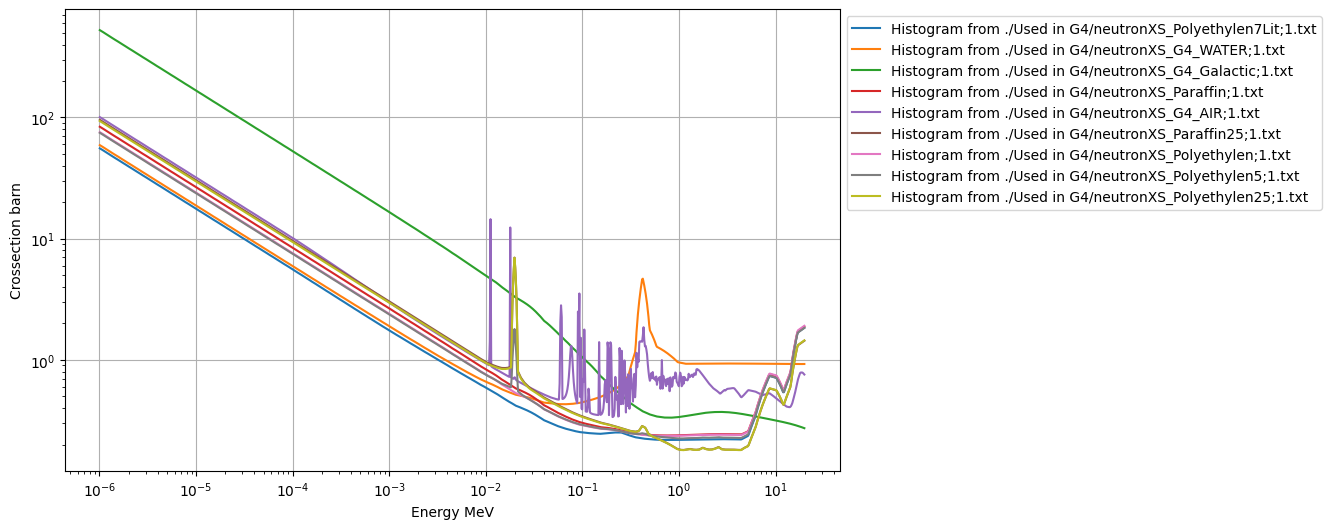

In [13]:
plt.figure(figsize=(10, 6))

for file in data_files:
    print(f"Processing file: {file}")
    data = pd.read_csv(f'{file}', sep="\t", header=0)
    bin_centers = data["Bin Center"].values
    bin_values = data["Bin Value"].values

    # Plotten der Histogramme
    plt.plot(bin_centers, bin_values, label=f"Histogram from {file}")


plt.xlabel("Energy MeV")
plt.ylabel("Crossection barn")
plt.yscale("log")  # Optional: logarithmische Skalierung
plt.xscale("log")  # Optional: logarithmische Skalierung
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Production of a neutron and an alpha particle, plus a residual

In [5]:
data_bor10 = pd.read_csv('./Literature/B-10_N,N+A.txt', sep=r'\s+', header=None, engine='python')
data_C12 = pd.read_csv('./Literature/C-12_N,N+A.txt', sep=r'\s+', header=None, engine='python')
data_Fe56 = pd.read_csv('./Literature/Fe-56_N,N+A.txt', sep=r'\s+', header=None, engine='python')
data_Xe129 = pd.read_csv('./Literature/Xe-129_N,N+A.txt', sep=r'\s+', header=None, engine='python')
data_Cd113 = pd.read_csv('./Literature/Cd-113_N,N+A.txt', sep=r'\s+', header=None, engine='python')


data_Fe56 = data_Fe56[data_Fe56[0] <= 60]
data_bor10 = data_bor10[data_bor10[0] <= 60]
data_C12 = data_C12[data_C12[0] <= 60]
data_Xe129 = data_Xe129[data_Xe129[0] <= 60]

data_Fe56 = data_Fe56[data_Fe56[1] > 0]
data_bor10 = data_bor10[data_bor10[1] > 0]
data_C12 = data_C12[data_C12[1] > 0]
data_Xe129 = data_Xe129[data_Xe129[1] > 0]
data_Cd113 = data_Cd113[data_Cd113[1] > 0]

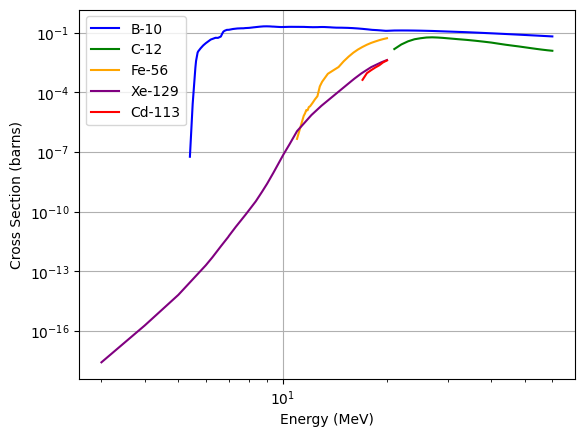

In [6]:
plt.plot(data_bor10[0], data_bor10[1], '-', label='B-10', color='blue')
plt.plot(data_C12[0], data_C12[1], '-', label='C-12', color='green')
plt.plot(data_Fe56[0], data_Fe56[1], '-', label='Fe-56', color='orange')
plt.plot(data_Xe129[0], data_Xe129[1], '-', label='Xe-129', color='purple')
plt.plot(data_Cd113[0], data_Cd113[1], '-', label='Cd-113', color='red')
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (barns)')
plt.xscale('log') 
plt.yscale('log') 
plt.grid()
plt.legend()

# (N,gamma) prozess


In [7]:
data_bor10 = pd.read_csv('./Literature/B-10_N,G.txt', sep=r'\s+', header=None, engine='python')
data_H1 = pd.read_csv('./Literature/H-1_N,G.txt', sep=r'\s+', header=None, engine='python')
data_C12 = pd.read_csv('./Literature/C-12_N,G.txt', sep=r'\s+', header=None, engine='python')
data_Fe56 = pd.read_csv('./Literature/Fe-56_N,G.txt', sep=r'\s+', header=None, engine='python')
data_Xe129 = pd.read_csv('./Literature/Xe-129_N,G.txt', sep=r'\s+', header=None, engine='python')
data_Cd113 = pd.read_csv('./Literature/Cd-113_N,G.txt', sep=r'\s+', header=None, engine='python')

data_Fe56 = data_Fe56[data_Fe56[0] <= 20]

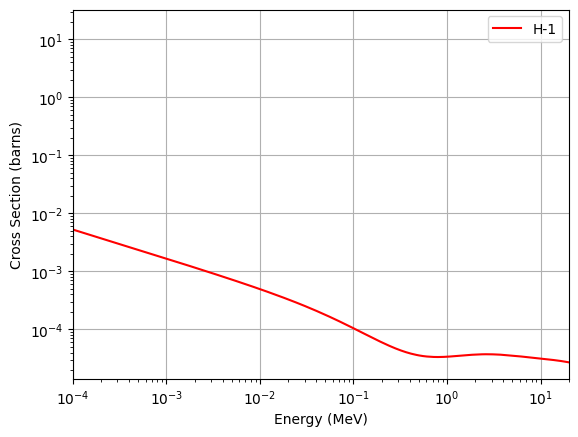

In [8]:
#plt.plot(data_bor10[0], data_bor10[1], '-', label='B-10', color='blue')
plt.plot(data_H1[0], data_H1[1], '-', label='H-1', color='red')
#plt.plot(data_C12[0], data_C12[1], '-', label='C-12', color='green')
#plt.plot(data_Fe56[0], data_Fe56[1], '-', label='Fe-56', color='orange')
#plt.plot(data_Xe129[0], data_Xe129[1], '-', label='Xe-129', color='purple')
#plt.step(bin_centers, bin_values, where="mid", label="TH1D Histogram")
#plt.step(bin_centers2, bin_values2, where="mid", label="TH1D Histogram 2")
#plt.plot(data_Cd113[0], data_Cd113[1], '-', label='Cd-113', color='brown')
plt.xlim(1e-4, 20)
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (barns)')
plt.xscale('log') 
plt.yscale('log') 
plt.grid()
plt.legend()

In [9]:
    
# Beispiel: Zwei Tabellen mit unterschiedlichen Bins einlesen
data1 = pd.read_csv('Xe-129_N,G.txt', sep=r'\s+', header=None, engine='python')  # Tabelle 1
data2 = pd.read_csv('Xe-129_N,N+A.txt', sep=r'\s+', header=None, engine='python')  # Tabelle 2

# Gemeinsame Bins definieren (z. B. logarithmisch verteilt)
common_bins = np.logspace(
    start=np.log10(min(data1[0].min(), data2[0].min())),
    stop=np.log10(max(data1[0].max(), data2[0].max())),
    num=1000  # Anzahl der Bins
)

# Interpolation auf die gemeinsamen Bins
data1_interp = np.interp(common_bins, data1[0], data1[1])  # Interpolation von Tabelle 1
data2_interp = np.interp(common_bins, data2[0], data2[1])  # Interpolation von Tabelle 2

# Addition der interpolierten Werte
result = data1_interp + data2_interp

# Ergebnis plotten
plt.plot(common_bins, result, label='Bor-10', color='purple')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (barns)')
plt.grid()
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Xe-129_N,G.txt'